In [4]:
import datetime as dt
import pandas as pd 
import numpy as np
from pathlib import Path
import sklearn.neural_network as skl_nn
import matplotlib.pyplot as plt
import sklearn.linear_model as skllm
import sklearn.model_selection as skl_ms
import scipy.stats as sps
import math


In [107]:
# formating monthly returns
SPXM = pd.read_csv(r"df_monthly_spx.csv")
SPXM["Date"] = pd.to_datetime(SPXM["Dates"])
SPXM.set_index("Date",inplace=True)
SPXM.drop(columns=["Dates"],inplace=True)
SPXM = (SPXM- SPXM.shift(1))/SPXM.shift(1)
SPXM = SPXM.iloc[220:,:]

### Ito's Process (Semi Manual)

assuming that $R=r\Delta t + \sigma\sqrt{\Delta t}  V$, such that $V \sim N(0,1)$

hence $R \sim  N (r\Delta t, \sigma\sqrt{\Delta t}) $, we can use sample mean and variance as the unbiased estimator of the values

further assuming 12 months in a trading year, $\Rightarrow \Delta t = \frac{1}{12} $

Here we used, $k_{a},k_{b}$ to adjust our sample Std & Mean to better reflet the data.


In [130]:
LRSPX = (SPXM+1)
em = LRSPX.mean()
ev = LRSPX.std()
ticker = "AAPL UQ Equity"
a = em[ticker]
b = ev[ticker]
e = LRSPX[ticker].dropna()
true = e.cumprod()
ka = 0.994
kb = 1 #0.5

In [131]:
print("mean = {}".format(em[ticker]))
print("std = {}".format(ev[ticker]))


mean = 1.0364006961766339
std = 0.09421610014898939


In [132]:
sample = pd.DataFrame(0,index=e.index,columns=range(0,500))
data = np.random.normal(ka*a,kb*b,sample.shape)

sample.loc[:,:] = data

fakes = sample.cumprod()

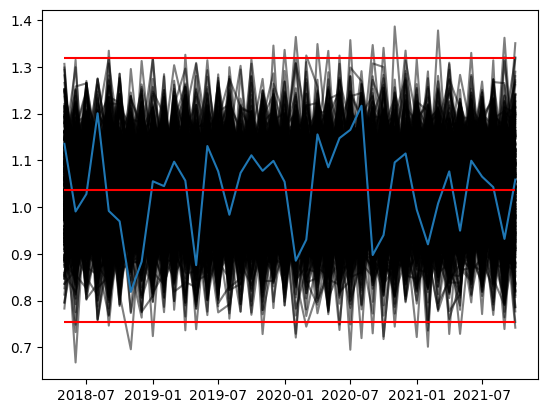

In [133]:
plt.plot(sample,'k',alpha=0.5)
plt.plot(e)
plt.hlines(a,e.index[0],e.index[-1],color="red")
plt.hlines(a+3*b,e.index[0],e.index[-1],color="red")
plt.hlines(a-3*b,e.index[0],e.index[-1],color="red")


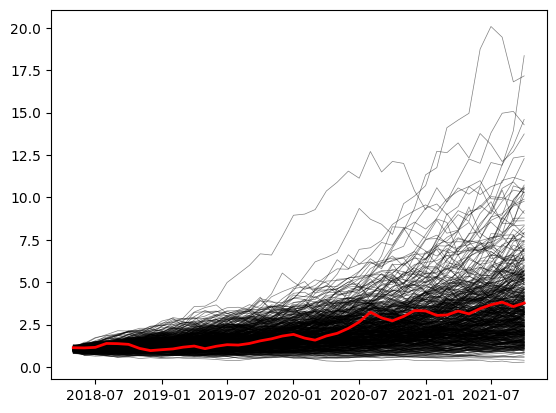

In [134]:
plt.plot(fakes,'k-',lw=0.5,alpha=0.5)
plt.plot(true,'r-',lw=2)

### Generalised Winer Process (Manual)

assuming that $S=a\Delta t + bV$, such that $V \sim N(0,1)$





In [135]:
sample = pd.DataFrame(0,index=e.index,columns=range(0,500))

data = np.random.normal(0.05,0.1,sample.shape)

sample.loc[:,:] = data

sample = sample.cumsum()+1


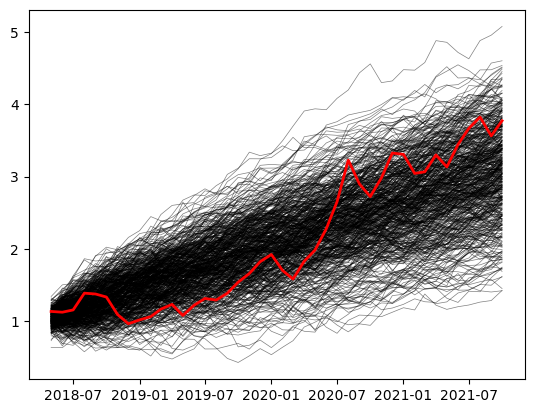

In [136]:
plt.plot(sample,'k-',lw=0.5,alpha=0.5)
plt.plot(true,'r-',lw=2)